/var/folders/ln/kls56lq93mq4z_459sxk1vbh0000gn/T/ipykernel_82391/3328432181.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER)
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume  \
Date                                                                   
2021-07-23  415.737457  416.077639  412.760755  413.450577  63766600   
2021-07-26  416.758026  416.767485  415.094869  415.142107  43719200   
2021-07-27  414.858643  415.737473  412.004764  415.709125  67397100   
2021-07-28  414.688538  416.077669  413.252168  415.491782  52472400   
2021-07-29  416.408356  417.495085  415.614570  415.624029  47435300   
...                ...         ...         ...         ...       ...   
2025-06-23  600.150024  600.539978  591.890015  595.039978  87426000   
2025-06-24  606.780029  607.849976  603.409973  604.330017  67735300   
2025-06-25  607.119995  608.609985  605.539978  607.909973  62114800   
2025-06-26  611.869995  612.309998  608.369995  608.989990  78548400   
2025-06-27  614.909973  616.390015  610.830017  612.880005  85980500   

Price       14_Day_RSI  Strategy  Cumalative Return  RSI Cumala

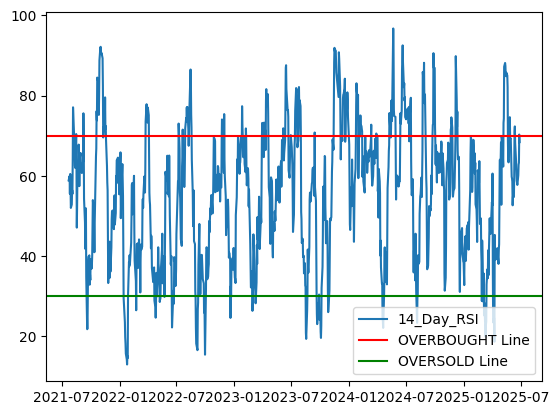

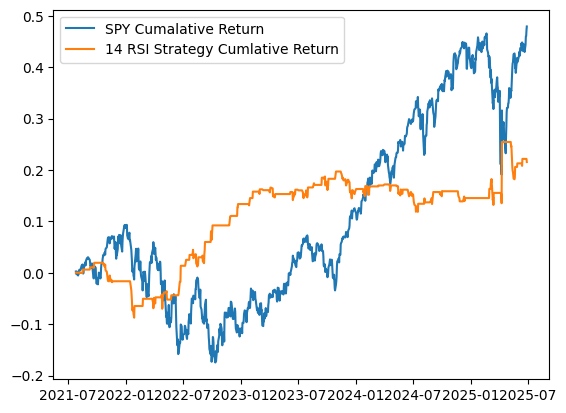

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

TICKER = "SPY"
RSI_LENGTH = 14
LOOKBACK = 1000
OVERBOUGHT = 70
OVERSOLD = 30


def get_data():
    df = yf.download(TICKER)
    df.columns = df.columns.get_level_values(0)
    return df.iloc[-LOOKBACK:, :]

def add_rsi(df):

    price_change = df["Close"].diff()

    gain = price_change.where(price_change > 0, 0)
    loss = -price_change.where(price_change < 0, 0)

    avg_gain = gain.rolling(RSI_LENGTH).mean()
    avg_loss = loss.rolling(RSI_LENGTH).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    df[f"{RSI_LENGTH}_Day_RSI"] = rsi

    plt.plot(df[f"{RSI_LENGTH}_Day_RSI"])
    plt.axhline(OVERBOUGHT, color="red")
    plt.axhline(OVERSOLD, color="green")
    plt.legend([f"{RSI_LENGTH}_Day_RSI", "OVERBOUGHT Line", "OVERSOLD Line"])

    return df.dropna()

def add_strategy(df):

    df["Strategy"] = 0
    df["Strategy"] = np.where(
        df[f"{RSI_LENGTH}_Day_RSI"] > OVERBOUGHT,
        -1,
        np.where(df[f"{RSI_LENGTH}_Day_RSI"] < OVERSOLD, 1, 0)
    )

    df["Strategy"] = df["Strategy"].shift()
    return df

def test_strategy(df):
    df["Cumalative Return"] = np.cumprod(1 + df["Close"].pct_change()) - 1
    df["RSI Cumalative Return"] = np.cumprod(1 + df["Close"].pct_change() * df["Strategy"]) - 1

    plt.figure()
    plt.plot(df["Cumalative Return"])
    plt.plot(df["RSI Cumalative Return"])
    plt.legend(
        [f"{TICKER} Cumalative Return", f"{RSI_LENGTH} RSI Strategy Cumlative Return"]
    )
    return df

def main():
    df = get_data()
    df = add_rsi(df)
    df = add_strategy(df)
    df = test_strategy(df)
  
    print(df)

main()